# NPB Scraping & Analysis for Pitcher
* 投手のデータの可視化と分析を行う例
* 詳しくは技術書典９ 機械学習の炊いたん３を参照

In [3]:
from bs4 import BeautifulSoup
import requests
import pandas as pd

import sys
sys.path.append('../')
from npb_scraping import player

from bs4 import Comment
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 前処理（今後npb_scrapingに統合予定）
* データの取得時は`str`型なので数値データは`int`または`float`に変換
* 空文字や`--`などのスコアがない物はNaNに変換

In [4]:
def preprocessing(data):
    categorical_columns = ['Hand']
    delete_columns = ['Notes']
    
    data.drop(delete_columns, axis=1, inplace=True)
    
    for c in data.columns:
        data[c].loc[data[c] == ''] = np.nan
        data[c].loc[data[c] == '--'] = np.nan
    
    numerical_columns = data.drop(categorical_columns, axis=1).columns
    
    data[numerical_columns] = data[numerical_columns].astype(float)
    data = pd.get_dummies(data)
    return data

* 可視化のための関数

In [5]:
def team_scatter(x, y, data, **viz_params):
    corr = np.corrcoef([data[x].values, data[y].values])[0,1]
    plt.figure(figsize=(10,10))
    plt.title(f'{x} vs {y} Correlation: {corr}')
    sns.scatterplot(
        x=x, y=y, hue='team', data=data.reset_index(), **viz_params)

## データの取得
* 2010年から2020年までの全チームの全選手の投手成績を取得する

In [21]:
pitcher = player.ScrapingNPBPitcher(year_list=np.arange(2010, 2020))

In [22]:
data = pitcher.get_table()

scraping 2010...
scraping 2011...
scraping 2012...
scraping 2013...
scraping 2014...
scraping 2015...
scraping 2016...
scraping 2017...
scraping 2018...
scraping 2019...
scraping 2010...
scraping 2011...
scraping 2012...
scraping 2013...
scraping 2014...
scraping 2015...
scraping 2016...
scraping 2017...
scraping 2018...
scraping 2019...


In [23]:
tmp_data = data.copy()
tmp_data = preprocessing(tmp_data)

# 可視化

In [24]:
tmp_data.columns

Index(['Age', 'W', 'L', 'W-L%', 'ERA', 'G', 'GS', 'GF', 'CG', 'SHO', 'SV',
       'IP', 'H', 'R', 'ER', 'HR', 'BB', 'IBB', 'SO', 'HBP', 'BK', 'WP', 'BF',
       'WHIP', 'H9', 'HR9', 'BB9', 'SO9', 'SO/W', 'Hand_Left', 'Hand_Right'],
      dtype='object')

In [25]:
tmp_data

Age     W     L   W-L%  \
team                         year Name                                       
Chunichi Dragons             2010 Kenta Asakura    29.0   3.0   6.0  0.333   
                                  Takuya Asao      25.0  12.0   3.0  0.800   
                                  Wei-Yin Chen     24.0  13.0  10.0  0.565   
                                  Masafumi Hirai   35.0   2.0   1.0  0.667   
                                  Yuichi Hisamoto  31.0   0.0   0.0    NaN   
...                                                 ...   ...   ...    ...   
Tohoku Rakuten Golden Eagles 2019 Yuhei Takanashi  26.0   2.0   1.0  0.667   
                                  Kanji Teraoka    26.0   0.0   0.0    NaN   
                                  Kenji Tomura     31.0   0.0   0.0    NaN   
                                  Yuki Watanabe    23.0   0.0   0.0    NaN   
                                  Hayato Yuge      25.0   3.0   3.0  0.500   

                                                    ERA     G    GS    GF  \
team                         year Name                                      
Chunichi Dragons             2010 Kenta Asakura    5.66   9.0   9.0   0.0   
                                  Takuya Asao      1.68  72.0   0.0  12.0   
                                  Wei-Yin Chen     2.87  29.0  27.0   0.0   
                                  Masafumi Hirai   2.20  46.0   0.0  17.0   
                                  Yuichi Hisamoto  7.50   6.0   0.0   1.0   
...                                                 ...   ...   ...   ...   
Tohoku Rakuten Golden Eagles 2019 Yuhei Takanashi  2.30  48.0   NaN   NaN   
                                  Kanji Teraoka    9.00   1.0   NaN   NaN   
                                  Kenji Tomura     6.32   6.0   NaN   NaN   
                                  Yuki Watanabe    0.00   1.0   NaN   NaN   
                                  Hayato Yuge      3.74   8.0   NaN   NaN   

                                                    CG  SHO  ...   WP     BF  \
team                         year Name                       ...               
Chunichi Dragons             2010 Kenta Asakura    0.0  0.0  ...  0.0  195.0   
                                  Takuya Asao      0.0  0.0  ...  3.0  307.0   
                                  Wei-Yin Chen     3.0  2.0  ...  5.0  773.0   
                                  Masafumi Hirai   0.0  0.0  ...  2.0  203.0   
                                  Yuichi Hisamoto  0.0  0.0  ...  0.0   27.0   
...                                                ...  ...  ...  ...    ...   
Tohoku Rakuten Golden Eagles 2019 Yuhei Takanashi  0.0  0.0  ...  0.0  146.0   
                                  Kanji Teraoka    0.0  0.0  ...  0.0   15.0   
                                  Kenji Tomura     0.0  0.0  ...  1.0   73.0   
                                  Yuki Watanabe    0.0  0.0  ...  0.0    5.0   
                                  Hayato Yuge      1.0  1.0  ...  0.0  172.0   

                                                    WHIP    H9  HR9   BB9  \
team                         year Name                                      
Chunichi Dragons             2010 Kenta Asakura    1.669  12.2  1.7   2.8   
                                  Takuya Asao      0.871   6.7  0.4   1.1   
                                  Wei-Yin Chen     1.144   7.9  1.0   2.3   
                                  Masafumi Hirai   1.143   7.3  0.9   2.9   
                                  Yuichi Hisamoto  1.667  13.5  1.5   1.5   
...                                                  ...   ...  ...   ...   
Tohoku Rakuten Golden Eagles 2019 Yuhei Takanashi  1.532   7.2  0.0   6.6   
                                  Kanji Teraoka    2.000  18.0  3.0   0.0   
                                  Kenji Tomura     1.660   9.8  0.6   5.2   
                                  Yuki Watanabe    2.000   0.0  0.0  18.0   
                                  Hayato Yuge      1.131   8.3  1.0   

In [26]:
tmp_data

Age     W     L   W-L%  \
team                         year Name                                       
Chunichi Dragons             2010 Kenta Asakura    29.0   3.0   6.0  0.333   
                                  Takuya Asao      25.0  12.0   3.0  0.800   
                                  Wei-Yin Chen     24.0  13.0  10.0  0.565   
                                  Masafumi Hirai   35.0   2.0   1.0  0.667   
                                  Yuichi Hisamoto  31.0   0.0   0.0    NaN   
...                                                 ...   ...   ...    ...   
Tohoku Rakuten Golden Eagles 2019 Yuhei Takanashi  26.0   2.0   1.0  0.667   
                                  Kanji Teraoka    26.0   0.0   0.0    NaN   
                                  Kenji Tomura     31.0   0.0   0.0    NaN   
                                  Yuki Watanabe    23.0   0.0   0.0    NaN   
                                  Hayato Yuge      25.0   3.0   3.0  0.500   

                                                    ERA     G    GS    GF  \
team                         year Name                                      
Chunichi Dragons             2010 Kenta Asakura    5.66   9.0   9.0   0.0   
                                  Takuya Asao      1.68  72.0   0.0  12.0   
                                  Wei-Yin Chen     2.87  29.0  27.0   0.0   
                                  Masafumi Hirai   2.20  46.0   0.0  17.0   
                                  Yuichi Hisamoto  7.50   6.0   0.0   1.0   
...                                                 ...   ...   ...   ...   
Tohoku Rakuten Golden Eagles 2019 Yuhei Takanashi  2.30  48.0   NaN   NaN   
                                  Kanji Teraoka    9.00   1.0   NaN   NaN   
                                  Kenji Tomura     6.32   6.0   NaN   NaN   
                                  Yuki Watanabe    0.00   1.0   NaN   NaN   
                                  Hayato Yuge      3.74   8.0   NaN   NaN   

                                                    CG  SHO  ...   WP     BF  \
team                         year Name                       ...               
Chunichi Dragons             2010 Kenta Asakura    0.0  0.0  ...  0.0  195.0   
                                  Takuya Asao      0.0  0.0  ...  3.0  307.0   
                                  Wei-Yin Chen     3.0  2.0  ...  5.0  773.0   
                                  Masafumi Hirai   0.0  0.0  ...  2.0  203.0   
                                  Yuichi Hisamoto  0.0  0.0  ...  0.0   27.0   
...                                                ...  ...  ...  ...    ...   
Tohoku Rakuten Golden Eagles 2019 Yuhei Takanashi  0.0  0.0  ...  0.0  146.0   
                                  Kanji Teraoka    0.0  0.0  ...  0.0   15.0   
                                  Kenji Tomura     0.0  0.0  ...  1.0   73.0   
                                  Yuki Watanabe    0.0  0.0  ...  0.0    5.0   
                                  Hayato Yuge      1.0  1.0  ...  0.0  172.0   

                                                    WHIP    H9  HR9   BB9  \
team                         year Name                                      
Chunichi Dragons             2010 Kenta Asakura    1.669  12.2  1.7   2.8   
                                  Takuya Asao      0.871   6.7  0.4   1.1   
                                  Wei-Yin Chen     1.144   7.9  1.0   2.3   
                                  Masafumi Hirai   1.143   7.3  0.9   2.9   
                                  Yuichi Hisamoto  1.667  13.5  1.5   1.5   
...                                                  ...   ...  ...   ...   
Tohoku Rakuten Golden Eagles 2019 Yuhei Takanashi  1.532   7.2  0.0   6.6   
                                  Kanji Teraoka    2.000  18.0  3.0   0.0   
                                  Kenji Tomura     1.660   9.8  0.6   5.2   
                                  Yuki Watanabe    2.000   0.0  0.0  18.0   
                                  Hayato Yuge      1.131   8.3  1.0   

In [27]:
tmp_data

Age     W     L   W-L%  \
team                         year Name                                       
Chunichi Dragons             2010 Kenta Asakura    29.0   3.0   6.0  0.333   
                                  Takuya Asao      25.0  12.0   3.0  0.800   
                                  Wei-Yin Chen     24.0  13.0  10.0  0.565   
                                  Masafumi Hirai   35.0   2.0   1.0  0.667   
                                  Yuichi Hisamoto  31.0   0.0   0.0    NaN   
...                                                 ...   ...   ...    ...   
Tohoku Rakuten Golden Eagles 2019 Yuhei Takanashi  26.0   2.0   1.0  0.667   
                                  Kanji Teraoka    26.0   0.0   0.0    NaN   
                                  Kenji Tomura     31.0   0.0   0.0    NaN   
                                  Yuki Watanabe    23.0   0.0   0.0    NaN   
                                  Hayato Yuge      25.0   3.0   3.0  0.500   

                                                    ERA     G    GS    GF  \
team                         year Name                                      
Chunichi Dragons             2010 Kenta Asakura    5.66   9.0   9.0   0.0   
                                  Takuya Asao      1.68  72.0   0.0  12.0   
                                  Wei-Yin Chen     2.87  29.0  27.0   0.0   
                                  Masafumi Hirai   2.20  46.0   0.0  17.0   
                                  Yuichi Hisamoto  7.50   6.0   0.0   1.0   
...                                                 ...   ...   ...   ...   
Tohoku Rakuten Golden Eagles 2019 Yuhei Takanashi  2.30  48.0   NaN   NaN   
                                  Kanji Teraoka    9.00   1.0   NaN   NaN   
                                  Kenji Tomura     6.32   6.0   NaN   NaN   
                                  Yuki Watanabe    0.00   1.0   NaN   NaN   
                                  Hayato Yuge      3.74   8.0   NaN   NaN   

                                                    CG  SHO  ...   WP     BF  \
team                         year Name                       ...               
Chunichi Dragons             2010 Kenta Asakura    0.0  0.0  ...  0.0  195.0   
                                  Takuya Asao      0.0  0.0  ...  3.0  307.0   
                                  Wei-Yin Chen     3.0  2.0  ...  5.0  773.0   
                                  Masafumi Hirai   0.0  0.0  ...  2.0  203.0   
                                  Yuichi Hisamoto  0.0  0.0  ...  0.0   27.0   
...                                                ...  ...  ...  ...    ...   
Tohoku Rakuten Golden Eagles 2019 Yuhei Takanashi  0.0  0.0  ...  0.0  146.0   
                                  Kanji Teraoka    0.0  0.0  ...  0.0   15.0   
                                  Kenji Tomura     0.0  0.0  ...  1.0   73.0   
                                  Yuki Watanabe    0.0  0.0  ...  0.0    5.0   
                                  Hayato Yuge      1.0  1.0  ...  0.0  172.0   

                                                    WHIP    H9  HR9   BB9  \
team                         year Name                                      
Chunichi Dragons             2010 Kenta Asakura    1.669  12.2  1.7   2.8   
                                  Takuya Asao      0.871   6.7  0.4   1.1   
                                  Wei-Yin Chen     1.144   7.9  1.0   2.3   
                                  Masafumi Hirai   1.143   7.3  0.9   2.9   
                                  Yuichi Hisamoto  1.667  13.5  1.5   1.5   
...                                                  ...   ...  ...   ...   
Tohoku Rakuten Golden Eagles 2019 Yuhei Takanashi  1.532   7.2  0.0   6.6   
                                  Kanji Teraoka    2.000  18.0  3.0   0.0   
                                  Kenji Tomura     1.660   9.8  0.6   5.2   
                                  Yuki Watanabe    2.000   0.0  0.0  18.0   
                                  Hayato Yuge      1.131   8.3  1.0   

## 基本的な値

In [28]:
def each_team_dist(data, column, year, **viz_params):
    upper = data[column].max()
    down = data[column].min()
    for t in (player.C_TEAM_NAMES + player.P_TEAM_NAMES):
        t_data = data.loc[pd.IndexSlice[t,year,:], column]
        sns.distplot(t_data, **viz_params)
        plt.title(f'{t}: number of pither: {t_data.shape[0]}')
        plt.xlim(down, upper)
        plt.show()

In [29]:
# イニング数が20以上
tw_game_pitcher = tmp_data.loc[tmp_data['IP'] > 20]

In [30]:
ten_game_pitcher = tmp_data.loc[tmp_data['IP'] > 10]

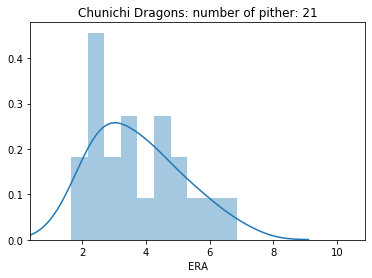

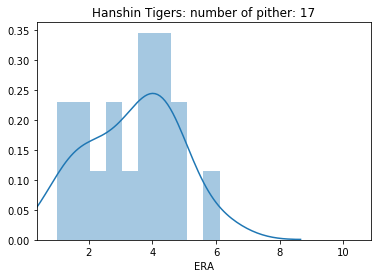

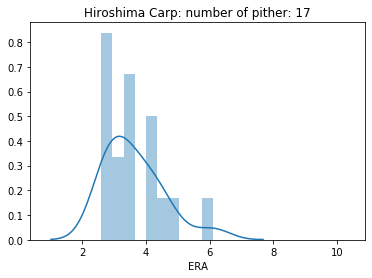

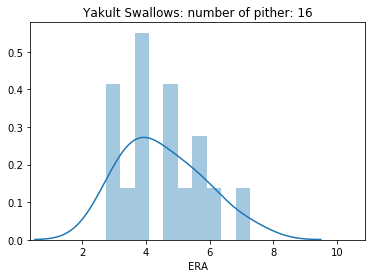

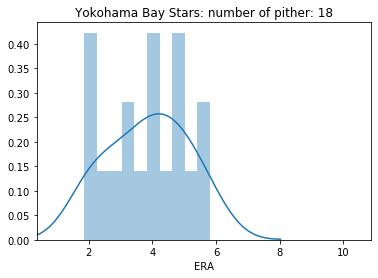

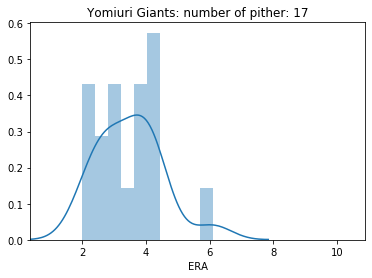

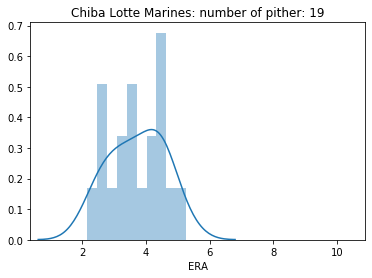

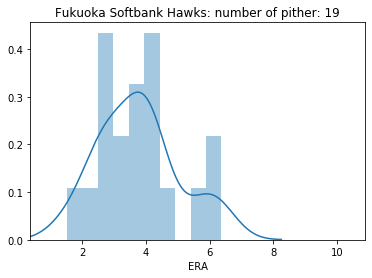

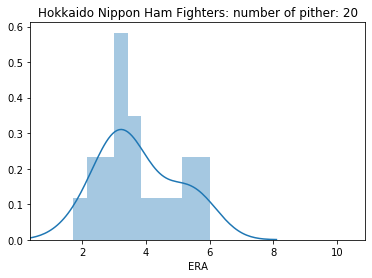

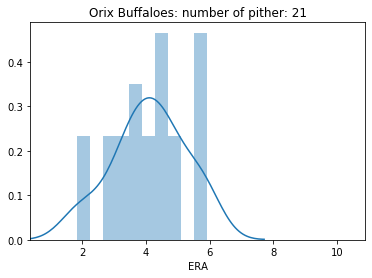

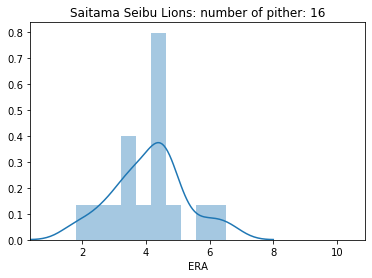

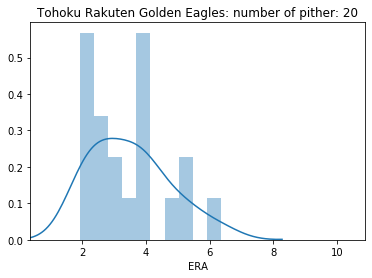

In [31]:
each_team_dist(tw_game_pitcher, 'ERA', 2019, bins=10)

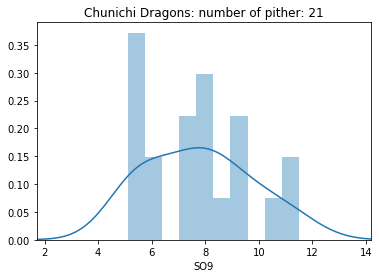

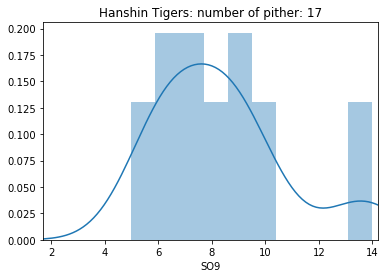

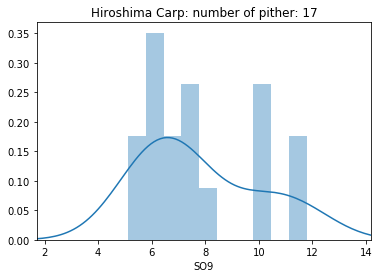

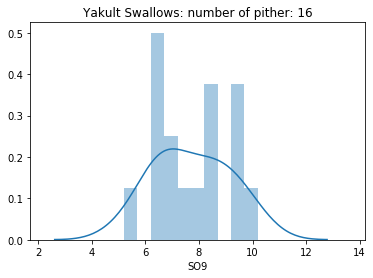

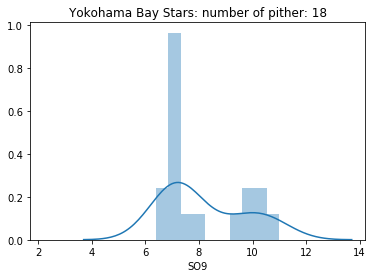

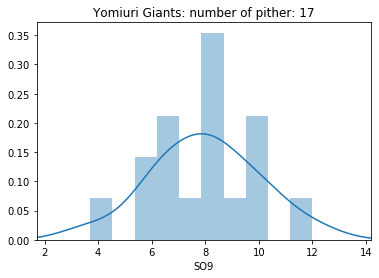

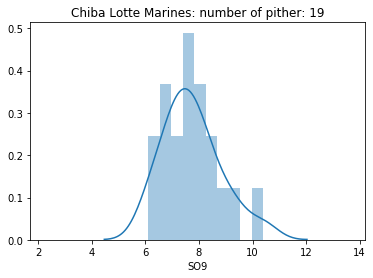

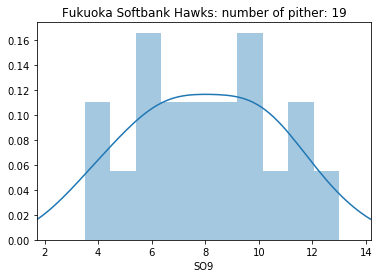

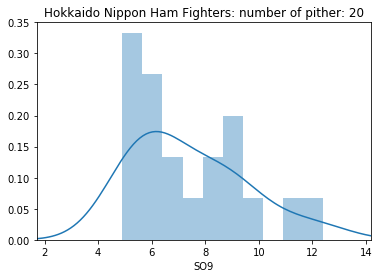

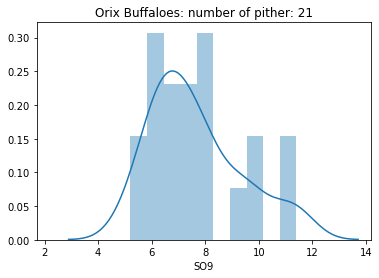

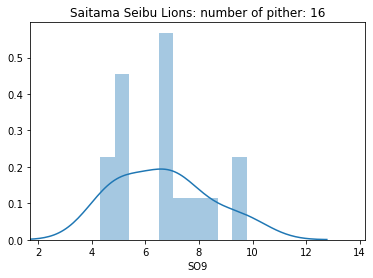

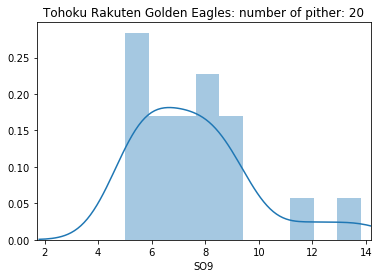

In [32]:
each_team_dist(tw_game_pitcher, 'SO9', 2019, bins=10)

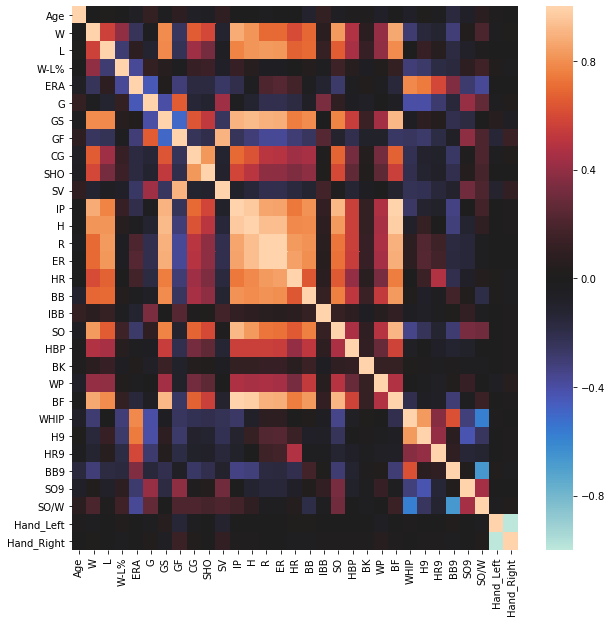

In [33]:
plt.figure(figsize=(10, 10))
sns.heatmap(tw_game_pitcher.corr(), center=0)
plt.ylim(tw_game_pitcher.shape[1], 0)
plt.show()

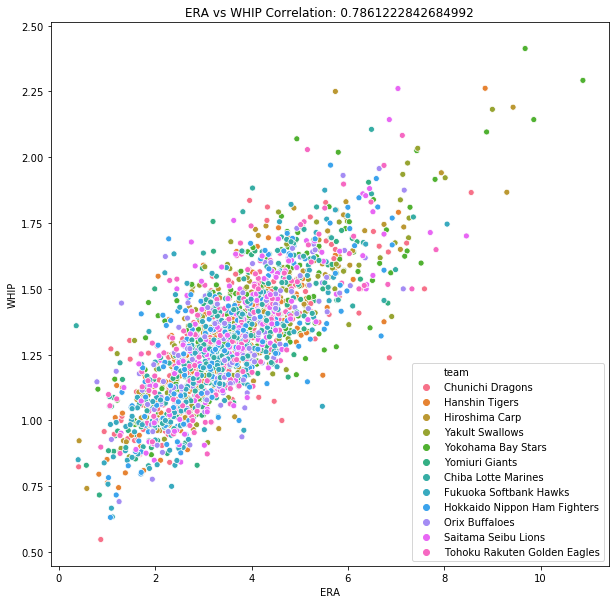

In [34]:
team_scatter('ERA', 'WHIP', tw_game_pitcher)

## WHIP
* WHIP，ヒット数，ホームラン数のチーム平均と失点数の相関を確認

In [36]:
columns = ['WHIP', 'ERA', 'H', 'HR']

In [38]:
avg_data = tw_game_pitcher.reset_index().groupby(['team', 'year']).mean()[columns]
total_run = tmp_data.reset_index().groupby(['team', 'year']).sum()[['ER', 'L']]

viz_data = pd.concat([avg_data, total_run], axis=1)

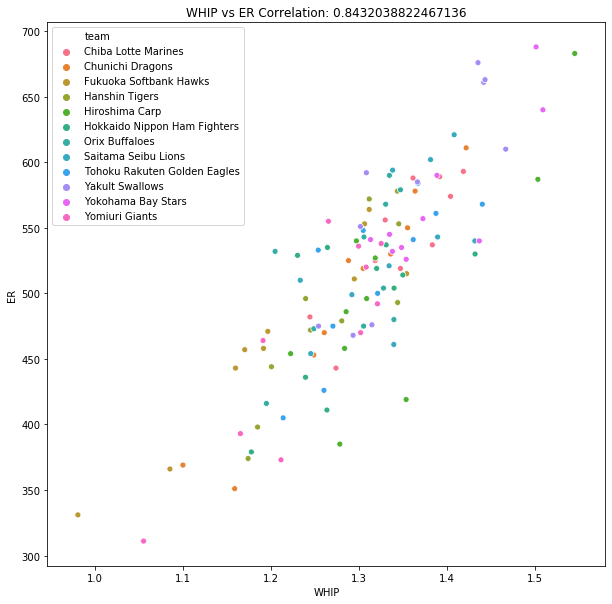

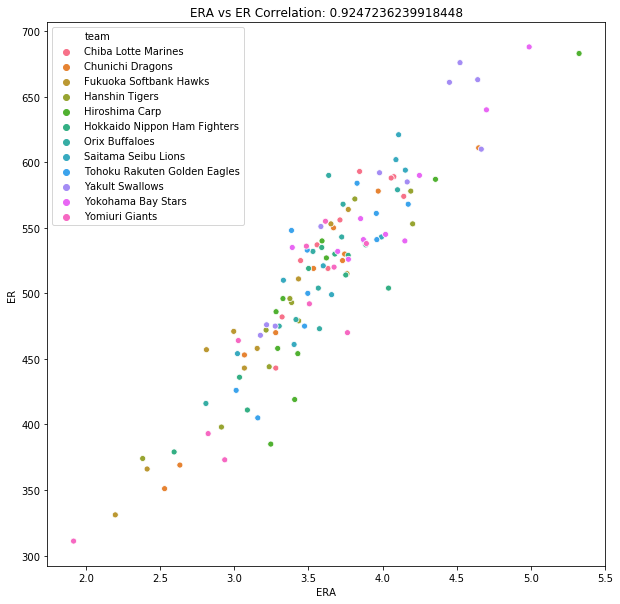

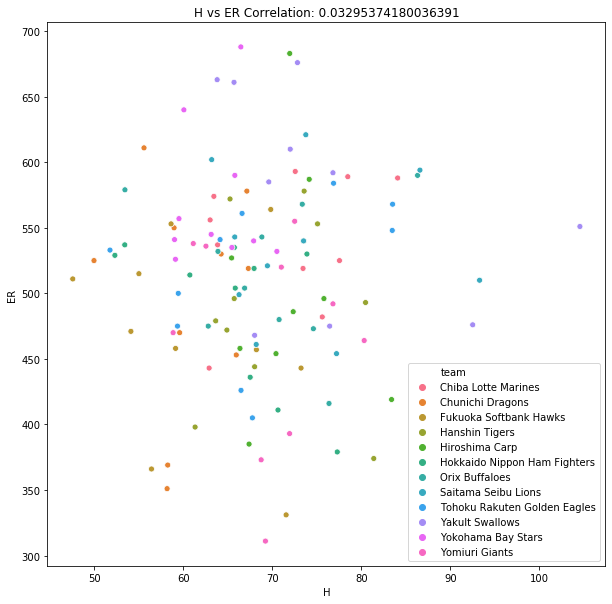

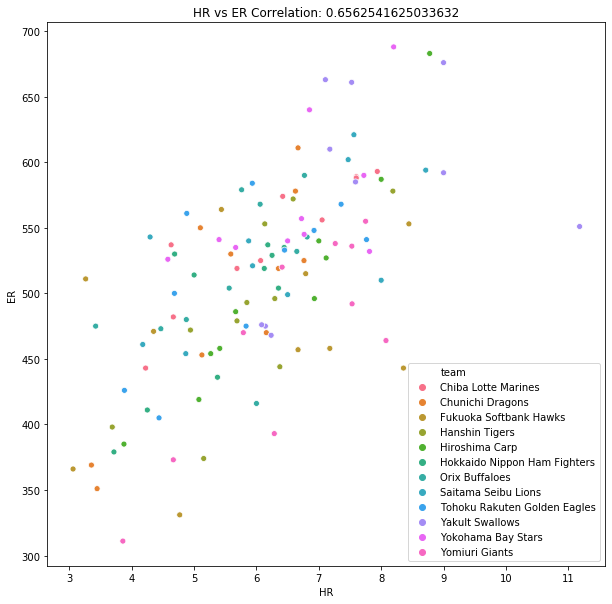

In [39]:
for c in columns:
    team_scatter(c, 'ER', viz_data)

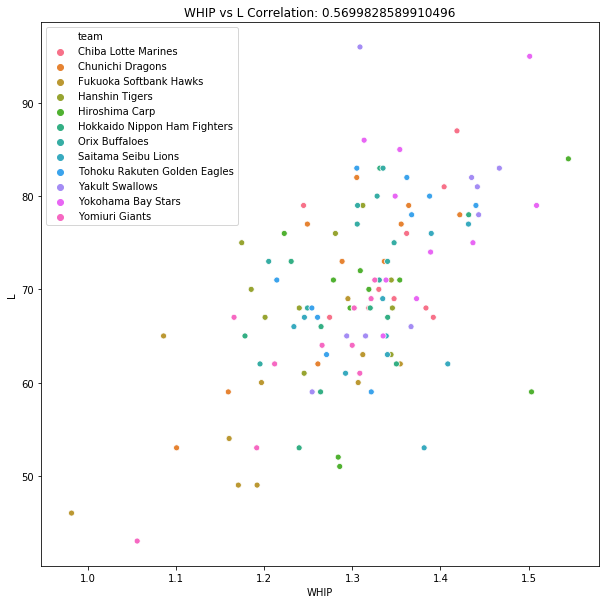

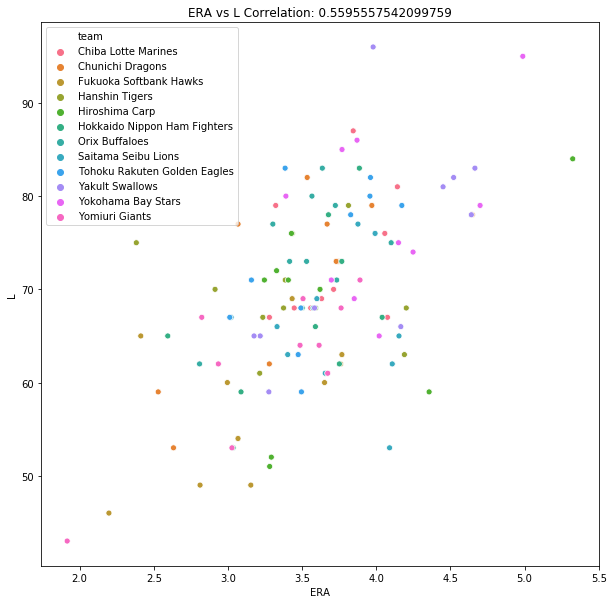

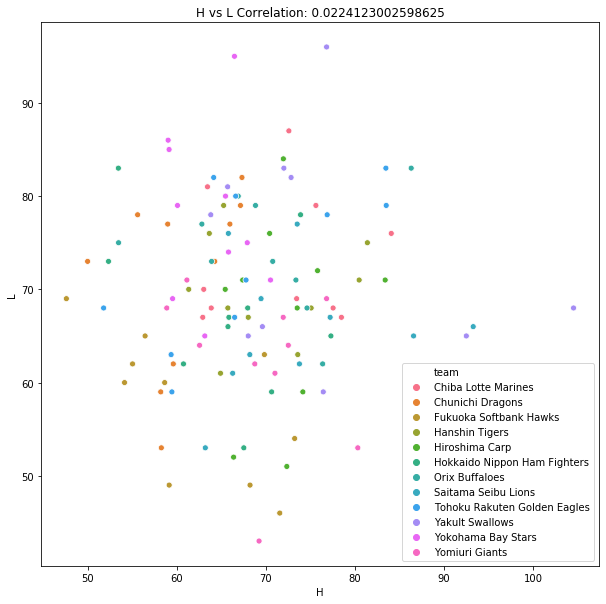

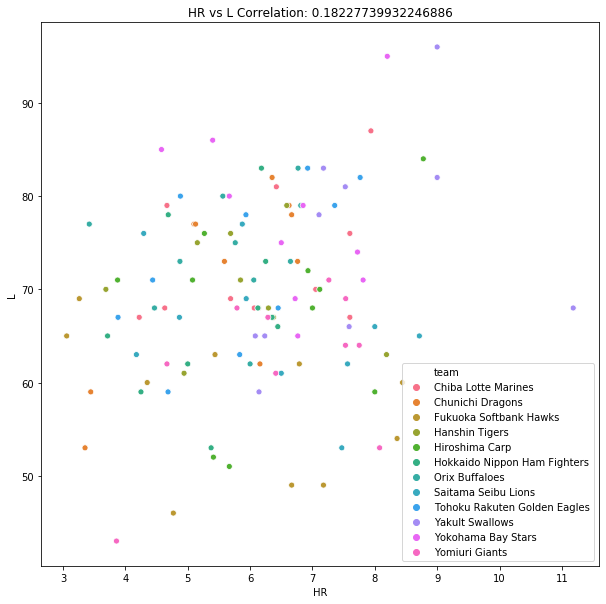

In [40]:
for c in columns:
    team_scatter(c, 'L', viz_data)

## WHIPの相対値
* 詳しくは技術書典９ 機械学習の炊いたん３を参照

In [41]:
def get_relative_data(data, league_teams, column, minus):
    league_data = data.loc[pd.IndexSlice[league_teams, :, :], :]
    year_mean = league_data.groupby('year').mean()
    
    relative_data = league_data - year_mean
    
    # イニング数で重み付け
    if minus:
        relative_data[f'IP_{column}'] = -relative_data[column]*league_data['IP']/143
    else:
        relative_data[f'IP_{column}'] = relative_data[column]*league_data['IP']/143
    
    return relative_data

In [42]:
def sum_relative_distplot(data, league_teams, column, xlim=(-0.6, 0.6), minus=True):
    fig, axes = plt.subplots(figsize=(15,10), ncols=3, nrows=2)
    
    relative_data = get_relative_data(data, league_teams, column, minus=minus)
    
    for i, c in enumerate(league_teams):
        team_data = relative_data.loc[pd.IndexSlice[c, :, :], f'IP_{column}']
        sum_team_score = team_data.sum()
        
        ax = axes[i//3, i%3]
        sns.distplot(team_data, ax=ax)
        ax.set_title(f'{c}, score: {sum_team_score:.3f}')
        ax.set_xlim(*xlim)
    plt.show()
    
def relative_bar_for_year(data, league_teams, column, margin=0.05, minus=True):
    fig, axes = plt.subplots(figsize=(15,10), ncols=3, nrows=2)
    
    relative_data = get_relative_data(data, league_teams, column, minus)
    
    max_score = -np.inf
    min_score = np.inf
    
    for i, c in enumerate(league_teams):
        team_data = relative_data.loc[pd.IndexSlice[c, :, :], f'IP_{column}']
        sum_team_score_for_year = team_data.groupby('year').sum()
        
        ax = axes[i//3, i%3]
        ax.bar(sum_team_score_for_year.index, sum_team_score_for_year)
        ax.set_title(f'{c}')
        
        max_team_score = max(sum_team_score_for_year)
        min_team_score = min(sum_team_score_for_year)
        
        if max_score < max_team_score:
            max_score = max_team_score
            
        if min_score > min_team_score:
            min_score = min_team_score
        
    for i, _ in enumerate(league_teams):
        ax = axes[i//3, i%3]
        ax.set_ylim(min_score-margin, max_score+margin)
        
    plt.show()

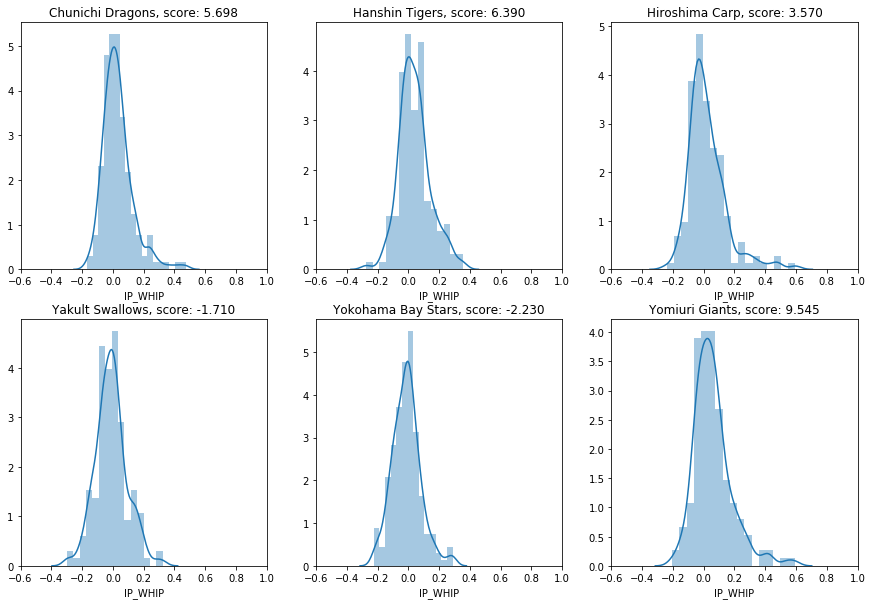

In [44]:
sum_relative_distplot(tw_game_pitcher, player.C_TEAM_NAMES, 'WHIP', xlim=(-0.6, 1.0))

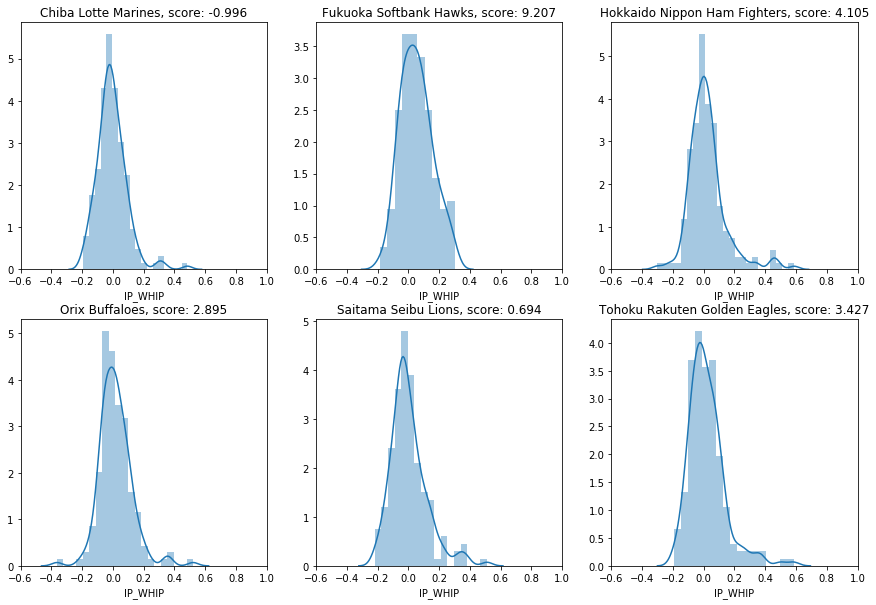

In [45]:
sum_relative_distplot(tw_game_pitcher, player.P_TEAM_NAMES, 'WHIP', xlim=(-0.6, 1.0))

### 年ごとの傾向

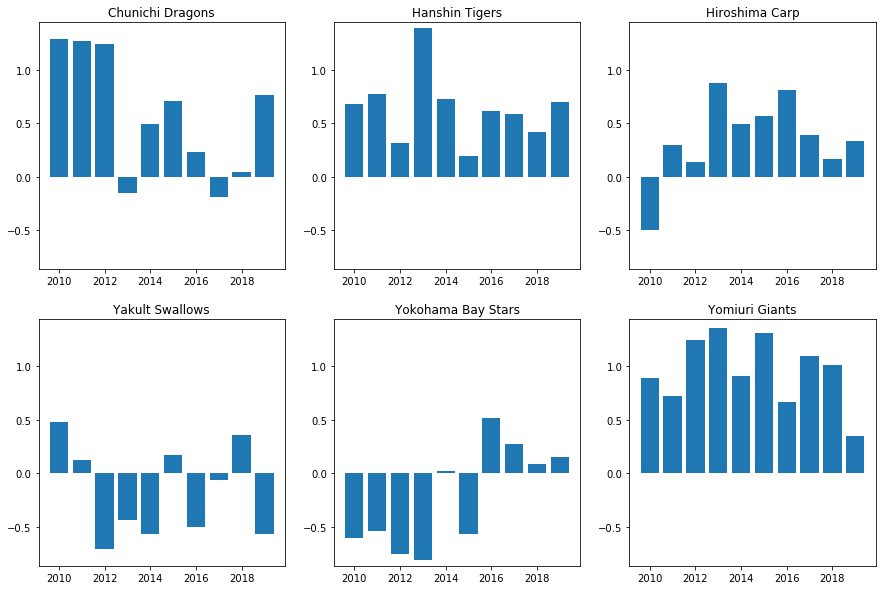

In [46]:
relative_bar_for_year(tw_game_pitcher, player.C_TEAM_NAMES, 'WHIP')

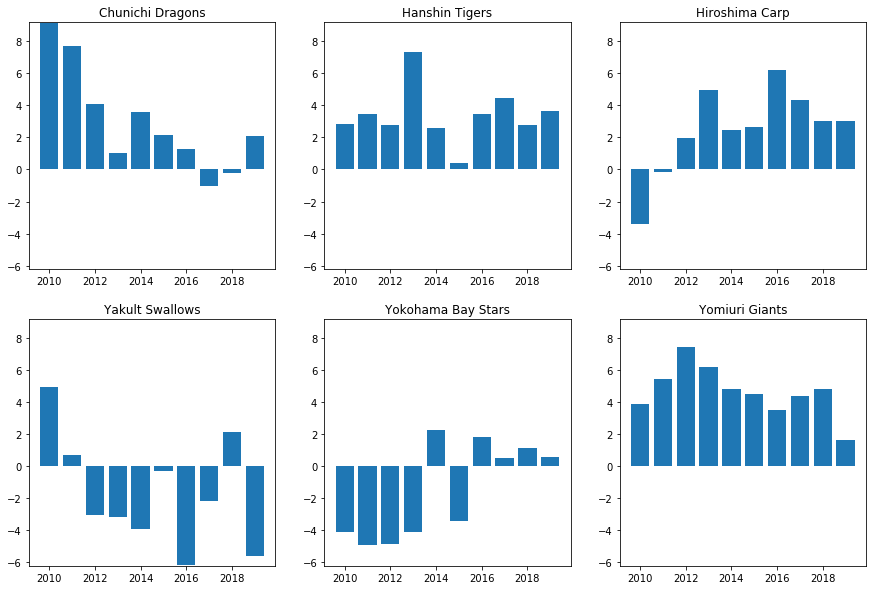

In [47]:
relative_bar_for_year(tw_game_pitcher, player.C_TEAM_NAMES, 'ERA')

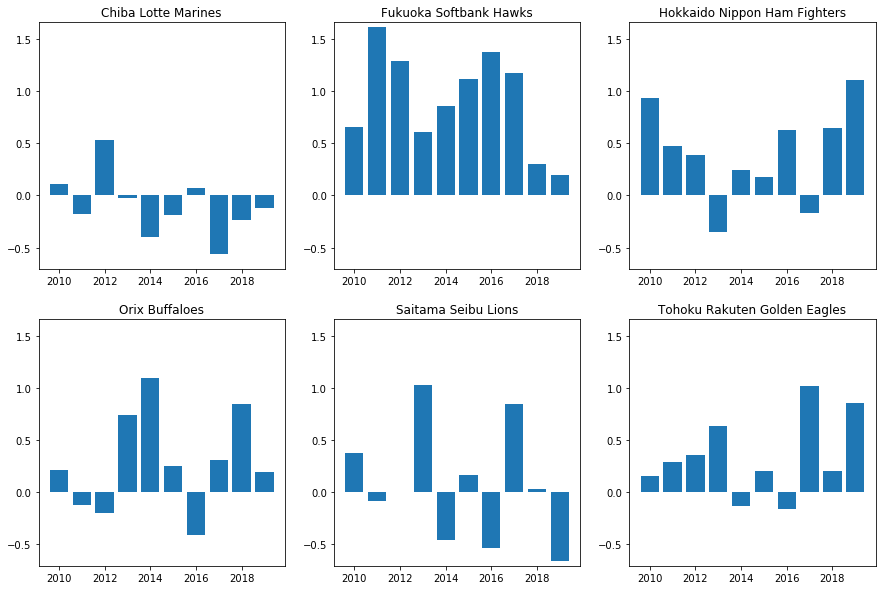

In [48]:
relative_bar_for_year(tw_game_pitcher, player.P_TEAM_NAMES, 'WHIP')

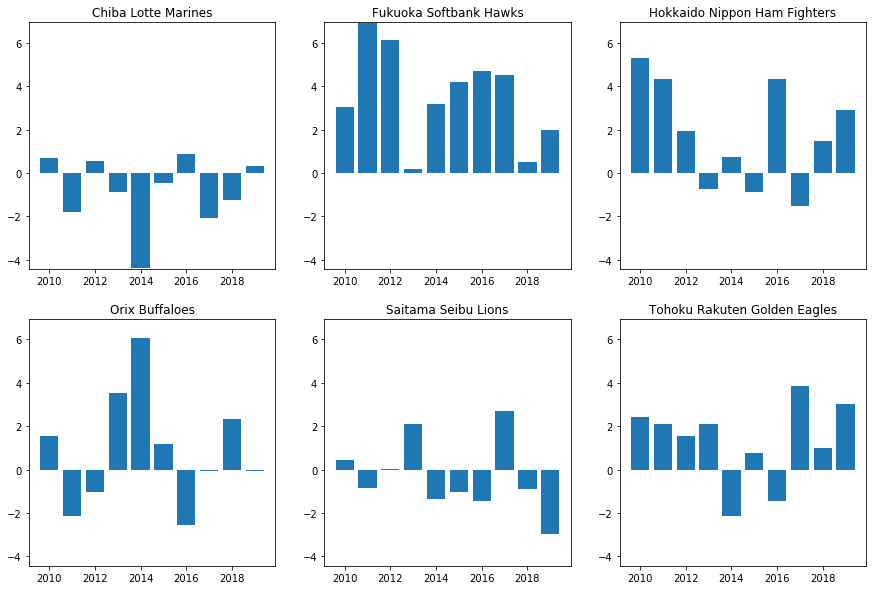

In [49]:
relative_bar_for_year(tw_game_pitcher, player.P_TEAM_NAMES, 'ERA')

### 年ごとのランキング

In [54]:
def ranking_for_year(data, league_teams, column):
    
    relative_data = get_relative_data(data, league_teams, column, minus=True)
    
    data_list = []
    
    for i, c in enumerate(league_teams):
        team_data = relative_data.loc[pd.IndexSlice[c, :, :], f'IP_{column}']
        sum_team_score = team_data.groupby('year').sum()
        sum_team_score.name = c
        data_list.append(sum_team_score)
    
    return pd.concat(data_list, axis=1)

In [55]:
ranking = ranking_for_year(tw_game_pitcher, player.C_TEAM_NAMES, 'WHIP')
ranking.rank(axis=1, ascending=False)

,Chunichi Dragons,Hanshin Tigers,Hiroshima Carp,Yakult Swallows,Yokohama Bay Stars,Yomiuri Giants
year,,,,,,
2010,1.0,3.0,5.0,4.0,6.0,2.0
2011,1.0,2.0,4.0,5.0,6.0,3.0
2012,2.0,3.0,4.0,5.0,6.0,1.0
2013,4.0,1.0,3.0,5.0,6.0,2.0
2014,3.0,2.0,4.0,6.0,5.0,1.0
2015,2.0,4.0,3.0,5.0,6.0,1.0
2016,5.0,3.0,1.0,6.0,4.0,2.0
2017,6.0,2.0,3.0,5.0,4.0,1.0
2018,6.0,2.0,4.0,3.0,5.0,1.0


In [56]:
ranking = ranking_for_year(tw_game_pitcher, player.C_TEAM_NAMES, 'ERA')
ranking.rank(axis=1, ascending=False)

,Chunichi Dragons,Hanshin Tigers,Hiroshima Carp,Yakult Swallows,Yokohama Bay Stars,Yomiuri Giants
year,,,,,,
2010,1.0,4.0,5.0,2.0,6.0,3.0
2011,1.0,3.0,5.0,4.0,6.0,2.0
2012,2.0,3.0,4.0,5.0,6.0,1.0
2013,4.0,1.0,3.0,5.0,6.0,2.0
2014,2.0,3.0,4.0,6.0,5.0,1.0
2015,3.0,4.0,2.0,5.0,6.0,1.0
2016,5.0,3.0,1.0,6.0,4.0,2.0
2017,5.0,1.0,3.0,6.0,4.0,2.0
2018,6.0,3.0,2.0,4.0,5.0,1.0


In [57]:
ranking = ranking_for_year(tw_game_pitcher, player.P_TEAM_NAMES, 'ERA')
ranking.rank(axis=1, ascending=False)

,Chiba Lotte Marines,Fukuoka Softbank Hawks,Hokkaido Nippon Ham Fighters,Orix Buffaloes,Saitama Seibu Lions,Tohoku Rakuten Golden Eagles
year,,,,,,
2010,5.0,2.0,1.0,4.0,6.0,3.0
2011,5.0,1.0,2.0,6.0,4.0,3.0
2012,4.0,1.0,2.0,6.0,5.0,3.0
2013,6.0,4.0,5.0,1.0,3.0,2.0
2014,6.0,2.0,3.0,1.0,4.0,5.0
2015,4.0,1.0,5.0,2.0,6.0,3.0
2016,3.0,1.0,2.0,6.0,5.0,4.0
2017,6.0,1.0,5.0,4.0,3.0,2.0
2018,6.0,4.0,2.0,1.0,5.0,3.0


# SO/W

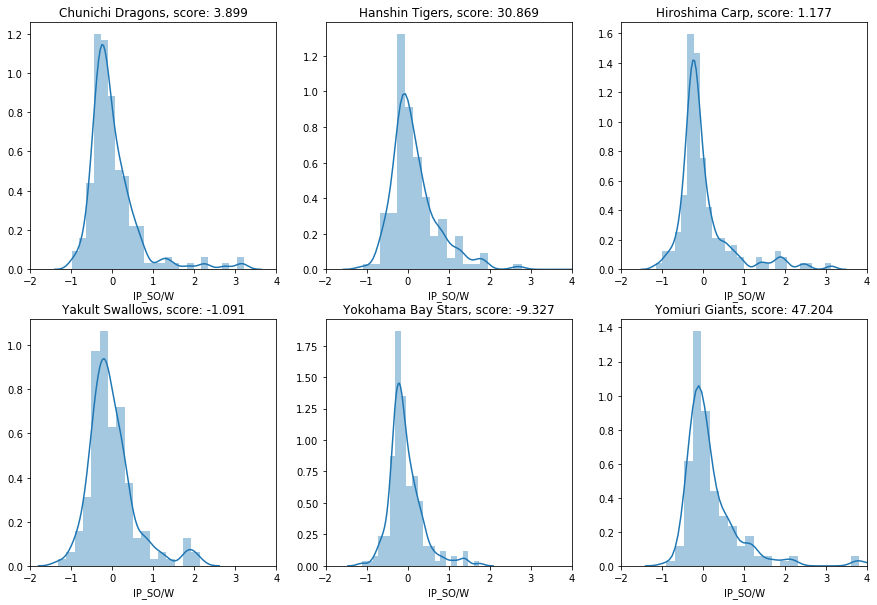

In [58]:
sum_relative_distplot(tw_game_pitcher, player.C_TEAM_NAMES, 'SO/W', xlim=(-2, 4), minus=False)

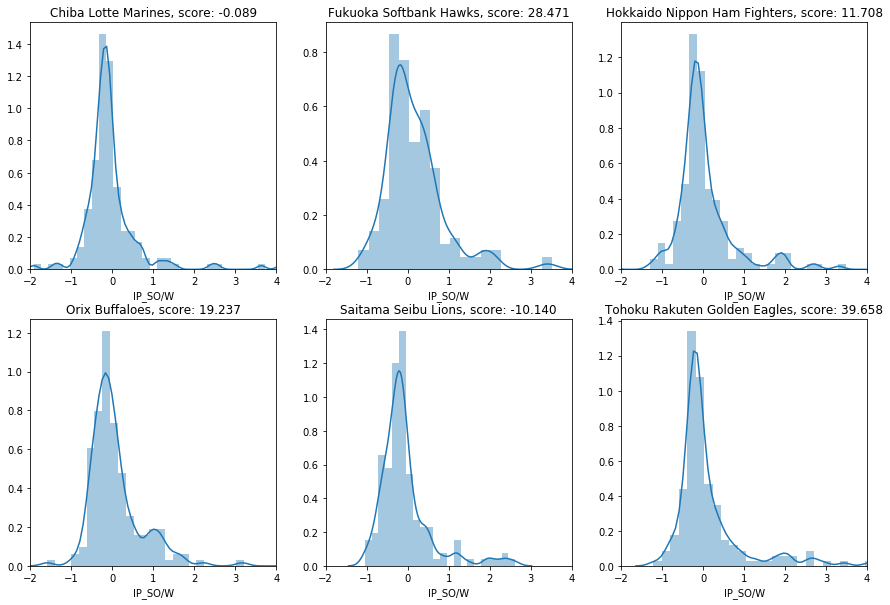

In [59]:
sum_relative_distplot(tw_game_pitcher, player.P_TEAM_NAMES, 'SO/W', xlim=(-2, 4), minus=False)

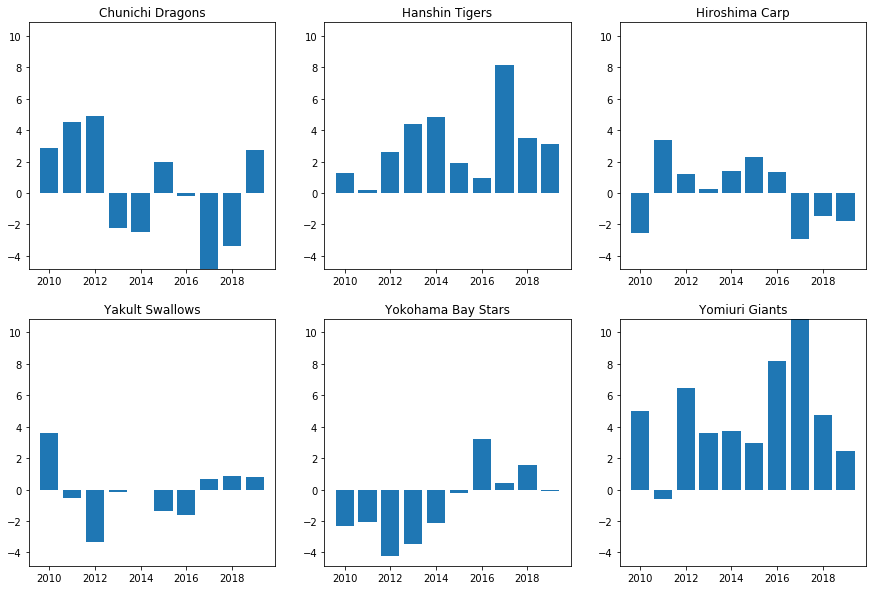

In [61]:
relative_bar_for_year(tw_game_pitcher, player.C_TEAM_NAMES, 'SO/W', minus=False)

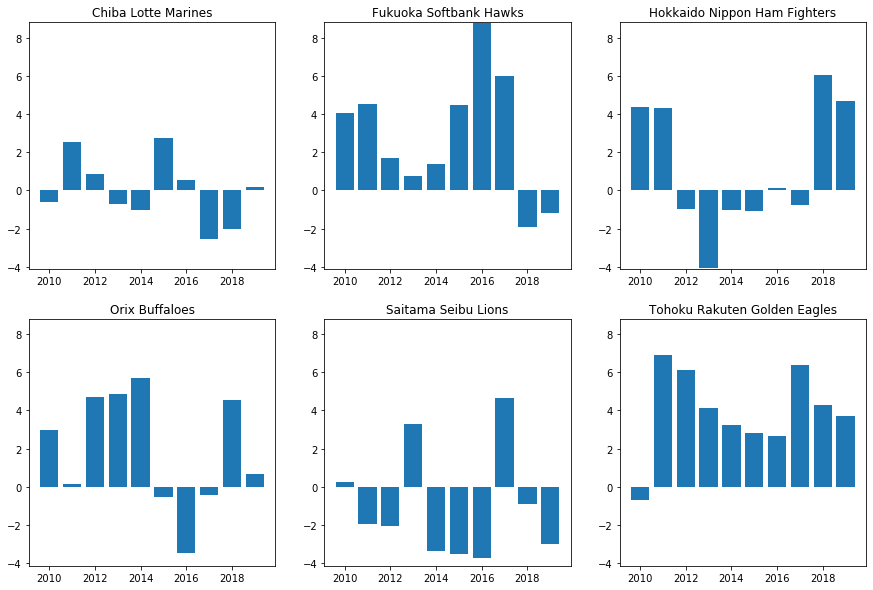

In [62]:
relative_bar_for_year(tw_game_pitcher, player.P_TEAM_NAMES, 'SO/W', minus=False)